In [140]:
import os 
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" 
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [141]:
import pandas as pd 
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [142]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


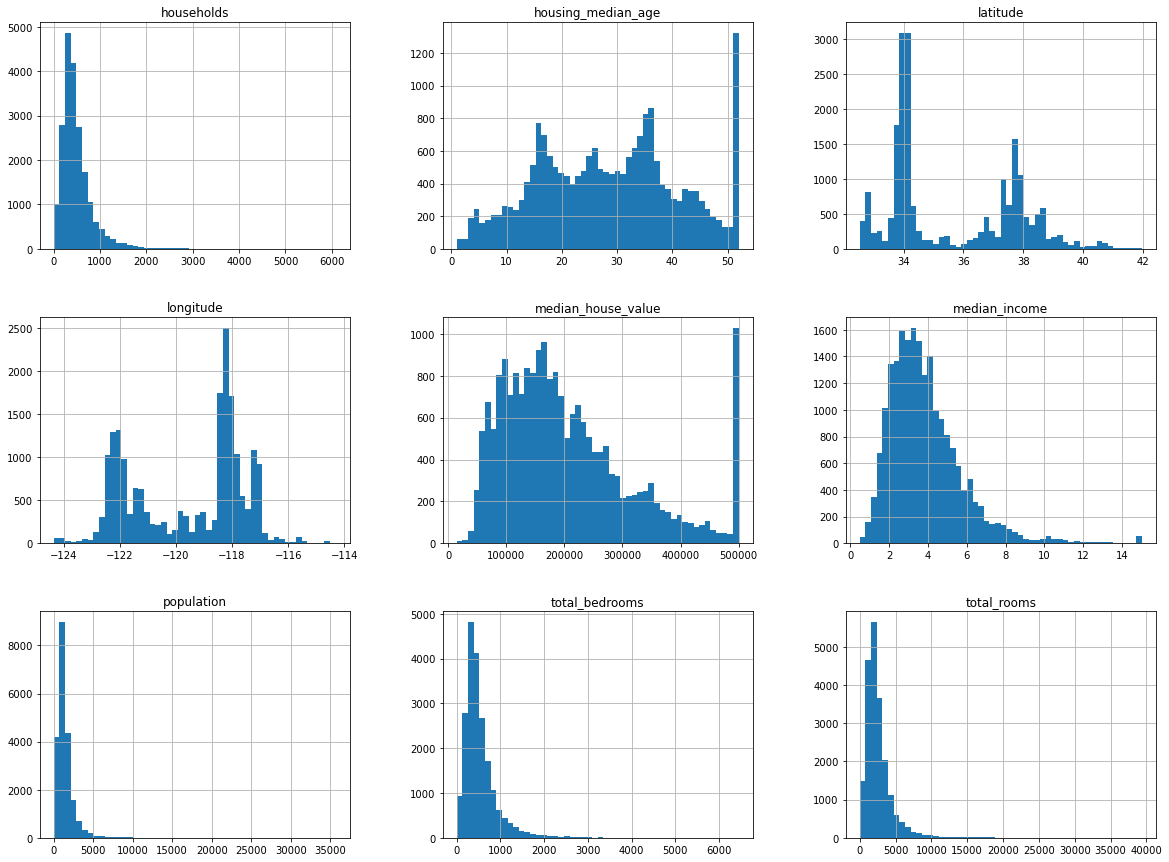

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(20,15))
plt.show()

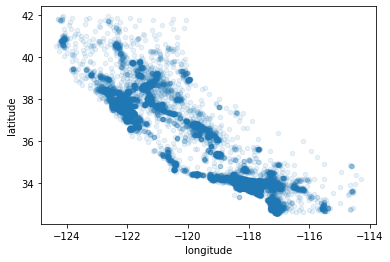

In [144]:
import numpy as np
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

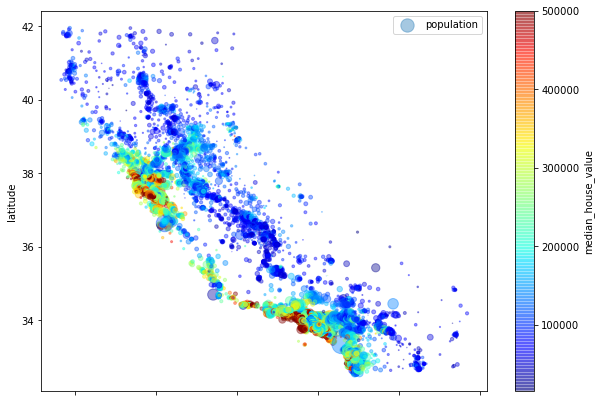

In [145]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [146]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [147]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [125]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [148]:
ocean_proximity = [housing.loc[housing['ocean_proximity'] == '<1H OCEAN']["median_house_value"].mean()
,housing.loc[housing['ocean_proximity'] == 'NEAR OCEAN']["median_house_value"].mean()
,housing.loc[housing['ocean_proximity'] == 'INLAND']["median_house_value"].mean()
,housing.loc[housing['ocean_proximity'] == 'NEAR BAY']["median_house_value"].mean()
,housing.loc[housing['ocean_proximity'] == 'ISLAND']["median_house_value"].mean()]
test = pd.DataFrame({
    'type':housing["ocean_proximity"].unique(),
    'value':ocean_proximity
})
ocean_proximity_rank = test.sort_values(by=['value'],ascending=True).reset_index(drop=True)
ocean_proximity_rank.index += 1 
encode = {v: k for k, v in ocean_proximity_rank.iloc[:,0].to_dict().items()}
encode

{'INLAND': 1, 'NEAR BAY': 2, '<1H OCEAN': 3, 'NEAR OCEAN': 4, 'ISLAND': 5}

In [150]:
test_housing = housing.copy()
test_housing = test_housing.replace({"ocean_proximity": encode})
test_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [157]:
corr_matrix = test_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
new_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,2
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1


In [129]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

housing_labels = housing["median_house_value"].copy()
housing_prepare = housing.drop("median_house_value",axis=1)
new_housing_labels = test_housing["median_house_value"].copy()
new_housing = test_housing.drop("median_house_value",axis=1)

housing_num = housing_prepare.drop("ocean_proximity", axis=1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ('num', pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing_prepare)
new_housing_prepared = pipeline.fit_transform(new_housing)

y = housing_labels
X = housing_prepared

y_new = new_housing_labels
X_new = new_housing_prepared


In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new,y_new,test_size=0.2, random_state=42)


In [133]:
X

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [134]:
def display_score(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard dviation:",score.std())

In [159]:
from sklearn.svm import SVR

lin_svr = SVR(C=300000.0, kernel='linear')
lin_svr.fit(X_new_train, y_train)


from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_new_train)
mse = np.sqrt(mean_squared_error(y_new_train, y_pred))
mse



70017.63318132002

In [50]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

def plot_learning_curve(estimator,X,y,train_size):
    print(__doc__)
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator = estimator,
    X = X,
    y = y, train_sizes = train_size,
    cv = 5,
    scoring = 'neg_mean_squared_error', shuffle=True)

    train_scores_mean = np.sqrt(-train_scores.mean(axis = 1))
    validation_scores_mean = np.sqrt(-validation_scores.mean(axis = 1))
    print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    print('\n', '-' * 20) # separator
    print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for a SVM regression model', fontsize = 18, y = 1.03)
#     plt.ticklabel_format(style='plain',axis='y',useOffset=False)
    plt.legend()

train_size = [1, 100, 500, 2000, 5000,10000, 13209]

In [ ]:
plot_learning_curve(RandomForestRegressor(),housing_prepared,housing_labels,train_size)

Automatically created module for IPython interactive environment


In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'degree':[2,3,4,5,6,7],
    'gamma':['scale', 'auto'],
    'coef0':[0.0,1.0,2.0]}
]
svm_reg = SVR(kernel='poly',verbose=True)
grid_search = GridSearchCV(svm_reg, param_grid,cv=5,scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVR(kernel='poly', verbose=True),
             param_grid=[{'coef0': [0.0, 1.0, 2.0],
                          'degree': [2, 3, 4, 5, 6, 7],
                          'gamma': ['scale', 'auto']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
grid_search.best_params_
print(np.sqrt(-grid_search.best_score_))

89755.23028202604


Automatically created module for IPython interactive environment
Mean training scores

 1            -0.000000
100      113084.227298
500      118437.728746
2000     111332.256650
5000     103480.214686
10000     93532.493325
13209     89418.121563
dtype: float64

 --------------------

Mean validation scores

 1        191306.856284
100      120581.571268
500      117781.178204
2000     113688.677122
5000     110972.429974
10000     98166.486844
13209     89756.437854
dtype: float64


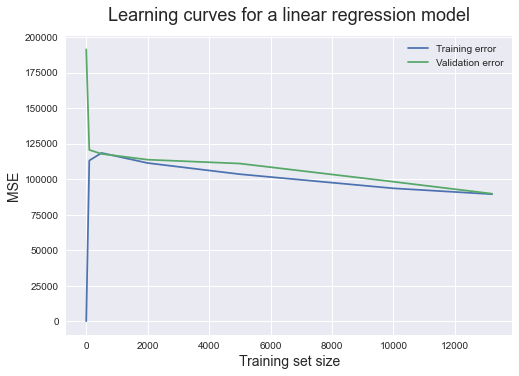

In [34]:
plot_learning_curve(SVR(kernel='poly',**grid_search.best_params_),housing_prepared,housing_labels,train_size)

Automatically created module for IPython interactive environment
Mean training scores

 1            -0.000000
100      127083.604876
500      117154.061686
2000     111884.160773
5000     103308.278035
10000     92994.332891
13209     88304.959476
dtype: float64

 --------------------

Mean validation scores

 1        179545.732092
100      119859.203399
500      117455.127750
2000     112668.460240
5000     110069.645507
10000     94211.129236
13209     88403.717689
dtype: float64


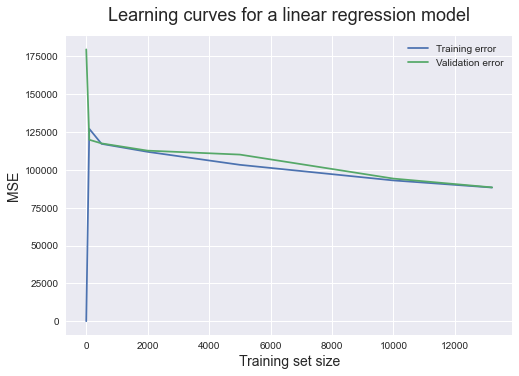

In [37]:
plot_learning_curve(SVR(kernel='poly',**grid_search.best_params_),test_housing_prepared,test_housing_label,train_size)

Automatically created module for IPython interactive environment
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Mean training scores

 1            -0.000000
100      116156.003137
500      116882.982179
2000     110854.002968
5000     102263.965075
10000     92553.556559
13209     88305.094182
dtype: float64

 --------------------

Mean validation scores

 1        159108.268865
100      118561.519453
500      118065.114361
2000     113886.477315
5000     103452.547273
10000     93691.228919
13209     88403.734589
dtype: float64


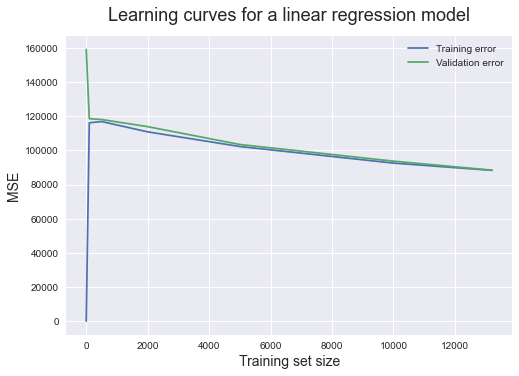

In [38]:
plot_learning_curve(SVR(kernel='poly',verbose=True,**grid_search.best_params_),test_housing_prepared,test_housing_label,train_size)

In [39]:
from sklearn.metrics import mean_squared_error
svm_reg = SVR(kernel='poly',verbose=True,**grid_search.best_params_)
svm_reg.fit(test_housing_prepared,test_housing_label)
housing_predictions = svm_reg.predict(test_housing_prepared)
lin_rmse = np.sqrt(mean_squared_error(test_housing_label,housing_predictions))
print(lin_rmse)

[LibSVM]85636.5216906365


In [41]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(test_housing_prepared,test_housing_label)
housing_predictions = lin_reg.predict(test_housing_prepared)
lin_rmse = np.sqrt(mean_squared_error(test_housing_label,housing_predictions))
print(lin_rmse)

69483.72348831888


In [42]:
forest = RandomForestRegressor()
forest.fit(test_housing_prepared,test_housing_label)
housing_predictions = forest.predict(test_housing_prepared)
lin_rmse = np.sqrt(mean_squared_error(test_housing_label,housing_predictions))
print(lin_rmse)

18379.824102809347


In [43]:
from sklearn.svm import LinearSVR
lin_svr = LinearSVR()
lin_svr.fit(test_housing_prepared,test_housing_label)
housing_predictions = lin_svr.predict(test_housing_prepared)
lin_rmse = np.sqrt(mean_squared_error(test_housing_label,housing_predictions))
print(lin_rmse)

222861.59326794863


Automatically created module for IPython interactive environment
Mean training scores

 1           -0.000000
100      29178.429992
500      26328.362251
2000     22795.914141
5000     20266.423258
10000    18968.696366
13209    18680.728620
dtype: float64

 --------------------

Mean validation scores

 1        128974.871975
100       78213.539289
500       67112.205137
2000      59000.854778
5000      54542.890623
10000     51129.389385
13209     49940.395065
dtype: float64


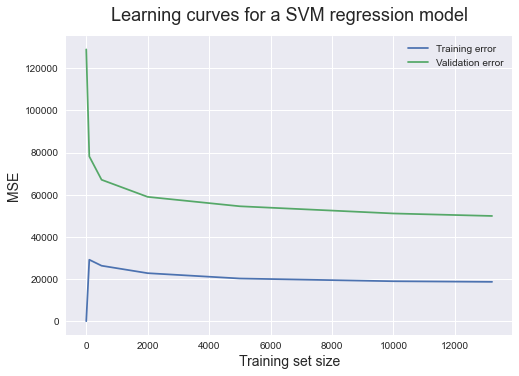

In [46]:
plot_learning_curve(RandomForestRegressor(),test_housing_prepared,test_housing_label,train_size)